In [18]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np 

(<Figure size 2500x800 with 1 Axes>, <Axes: >)

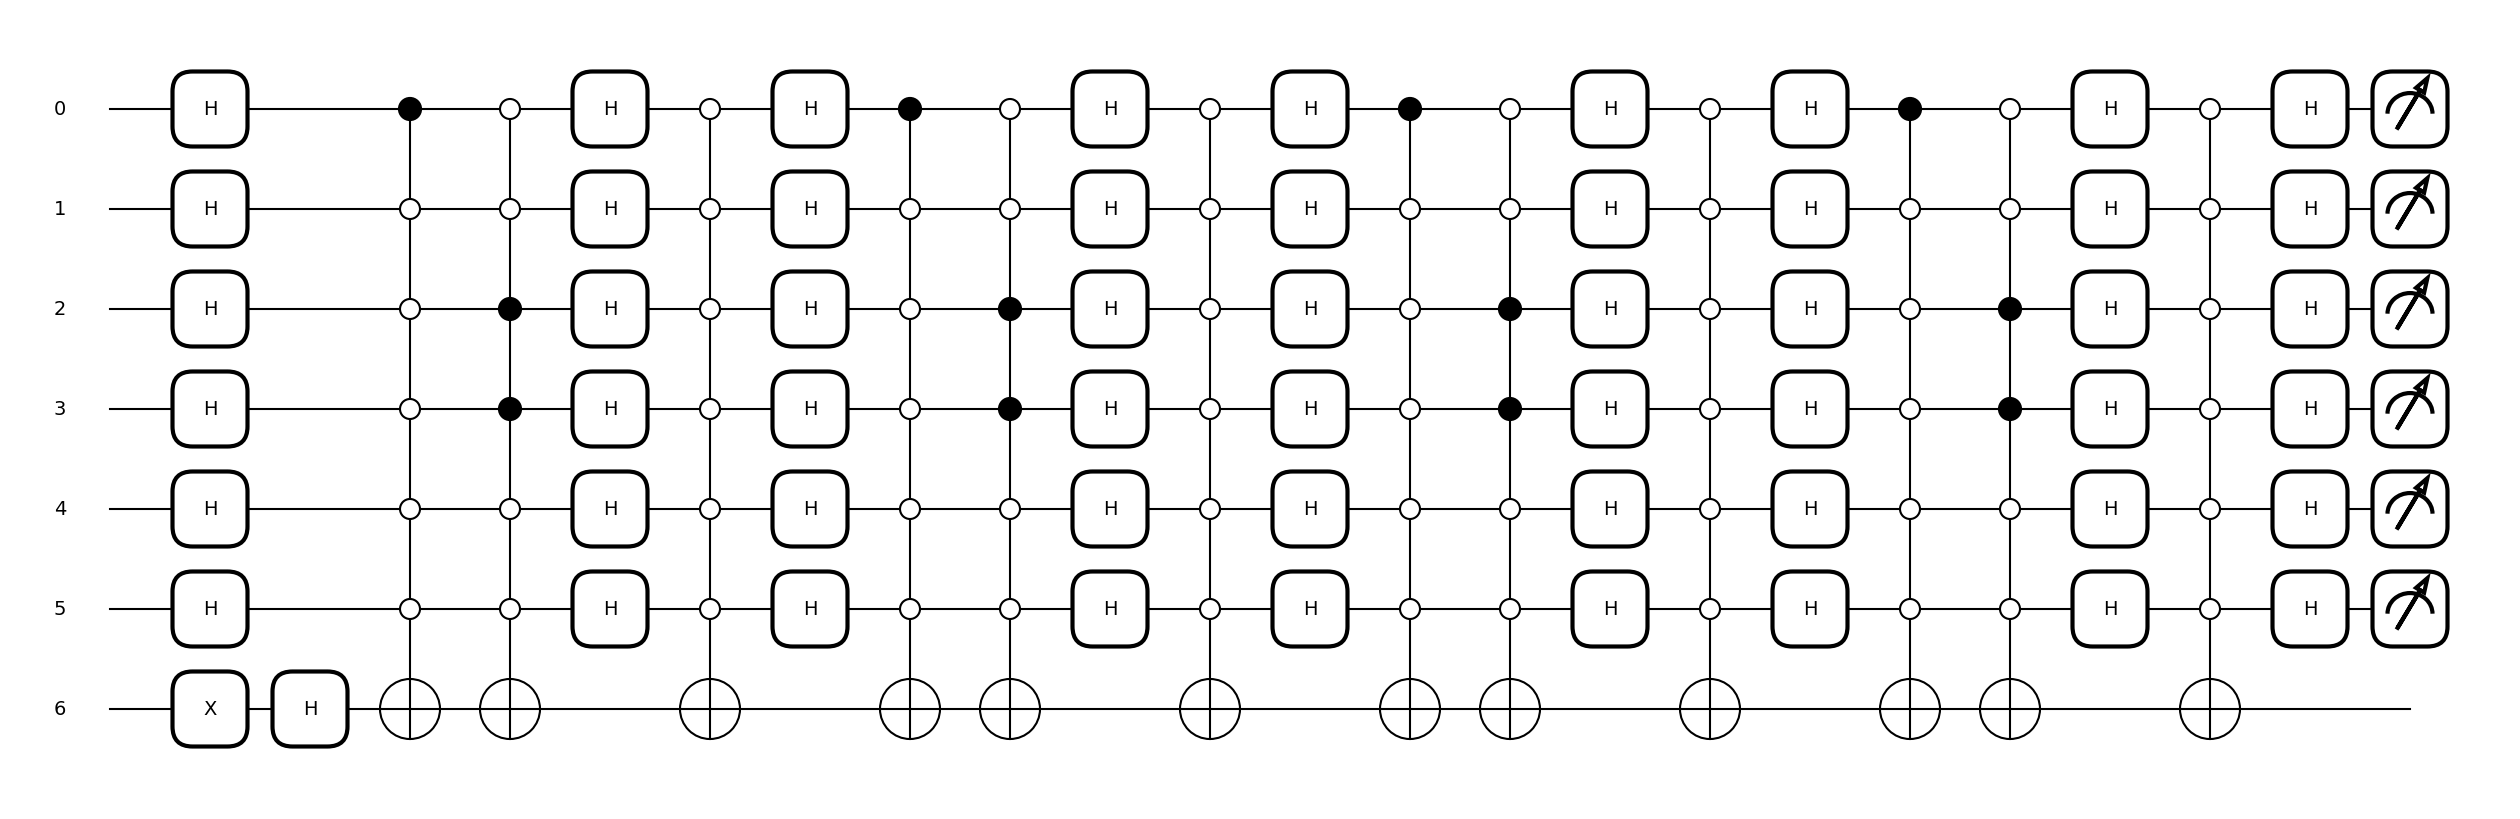

In [19]:
n_bits = 6
steps = 4
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register+aux

dev = qml.device('default.qubit', wires=n_bits+1)

def oracle_multi(combos):
    for combo in combos:
        combo_str = ''.join(str(j) for j in combo)
        qml.MultiControlledX(wires=all_wires, control_values=combo_str)


def hadamard_transform(my_wires):
    for wire in my_wires:
        qml.Hadamard(wires=wire)

def diffusion(n_bits):
    hadamard_transform(query_register)
    qml.MultiControlledX(wires=all_wires, control_values="0"*n_bits)
    hadamard_transform(query_register)

@qml.qnode(dev)
def grover_iter_multi(combos, num_steps):
    qml.PauliX(wires=n_bits)
    qml.Hadamard(wires=n_bits)
    hadamard_transform(query_register)

    for _ in range(num_steps):
        oracle_multi(combos)
        diffusion(n_bits)
    return qml.probs(wires=query_register)
    
              
qml.draw_mpl(grover_iter_multi)([[1,0,0,0,0,0], [0,0,1,1,0,0]], steps)

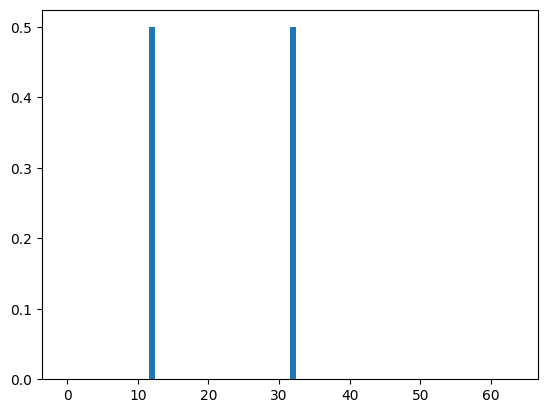

In [20]:
data = qml.QNode(grover_iter_multi, dev)([[1,0,0,0,0,0], [0,0,1,1,0,0]], steps)
data = [np.real(i) for i in data]
plt.bar(range(2**6), data)
plt.show()